In [3]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [4]:
data=PyPDFLoader('data/solar.pdf')
document=data.load()

Ignoring wrong pointing object 23 0 (offset 0)
Ignoring wrong pointing object 67 0 (offset 0)
Ignoring wrong pointing object 127 0 (offset 0)
Ignoring wrong pointing object 130 0 (offset 0)
Ignoring wrong pointing object 186 0 (offset 0)
Ignoring wrong pointing object 198 0 (offset 0)
Ignoring wrong pointing object 203 0 (offset 0)
Ignoring wrong pointing object 218 0 (offset 0)
Ignoring wrong pointing object 223 0 (offset 0)
Ignoring wrong pointing object 232 0 (offset 0)
Ignoring wrong pointing object 241 0 (offset 0)
Ignoring wrong pointing object 250 0 (offset 0)
Ignoring wrong pointing object 259 0 (offset 0)
Ignoring wrong pointing object 269 0 (offset 0)


SpaCy Text Splitter

Overview:

    Purpose: SpaCy's text splitter is often used to divide text into sentences or tokens. It relies on SpaCy's built-in sentence segmentation and tokenization features.
    Capabilities:
        Sentence Segmentation: Splits text into sentences based on linguistic rules and models.
        Tokenization: Breaks text into tokens, which can be used for more granular text processing.

Strengths:

    Language Understanding: Utilizes SpaCy's robust natural language processing capabilities, including sentence boundary detection and tokenization.
    Ease of Use: Simple and effective for tasks where sentence-level segmentation is sufficient.

Limitations:

    Granularity: May not handle very large documents or specific chunking requirements without additional customization.
    Limited to Sentence Segmentation: Primarily focuses on sentence-level splitting, not necessarily suitable for all chunking needs.

In [8]:
from langchain.text_splitter import SpacyTextSplitter
import spacy


In [10]:
from langchain.text_splitter import SpacyTextSplitter

# Initialize the Spacy text splitter
text_splitter = SpacyTextSplitter( chunk_size=300, chunk_overlap=20)

# Sample text
text = """
Natural Language Processing (NLP) is a sub-field of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. 
The ultimate goal of NLP is to enable computers to understand, interpret, and respond to human languages in a valuable way. 
Applications of NLP are vast and varied, including machine translation, sentiment analysis, speech recognition, and more.
"""

# Split the text
splitted_text = text_splitter.split_text(text)



/home/de/anaconda3/envs/metlife/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [11]:
splitted_text

['Natural Language Processing (NLP) is a sub-field of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. \n\n\nThe ultimate goal of NLP is to enable computers to understand, interpret, and respond to human languages in a valuable way.',
 'Applications of NLP are vast and varied, including machine translation, sentiment analysis, speech recognition, and more.']

SentenceTransformersTokenTextSplitter is a class in LangChain that splits text into chunks based on the token limits of a transformer model. It utilizes the sentence-transformers library to encode text and manage token counts. This ensures that each chunk of text adheres to the constraints imposed by transformer models, such as GPT or BERT, which have a maximum number of tokens they can handle in a single pass.
Key Features

    Token-Based Splitting: Ensures that each chunk of text fits within a specified token limit.
    Sentence-Level Splitting: By default, it splits text into sentences and then manages chunk sizes to stay within the token limit.
    Chunk Overlap: Optionally, you can include overlap between chunks to maintain context continuity across chunks.

In [12]:
from langchain.text_splitter import SentenceTransformersTokenTextSplitter

In [15]:
model_name = 'all-MiniLM-L6-v2'  # Example model, you can choose others based on your needs
splitter = SentenceTransformersTokenTextSplitter( chunk_size=512, chunk_overlap=50)

/home/de/anaconda3/envs/metlife/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/home/de/anaconda3/envs/metlife/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
pages=[]
len_words=0
for i in range(10):
    len_words=len_words+len(document[i].page_content)
    pages.append(document[i].page_content)


In [32]:
pages

['Our Solar System Lecture 8 \nThe Cassini  Jiong Qiu, MSU Physics Department ',
 'Guiding Questions 1.\u202fAre all the other planets similar to Earth, or are they very different? 2.\u202fDo other planets have moons like Earth’s Moon? 3.\u202fHow do astronomers know what the other planets are made of? 4.\u202fAre all the planets made of basically the same material? 5.\u202fWhat is the difference between an asteroid and a comet? 6.\u202fWhat determines whether a planet or satellite can retain a certain gas in its atmosphere? 7.\u202fWhy do interplanetary spacecraft carry devices for measuring magnetic fields? ',
 'Current, Future, and Past Solar System Missions     Planetary exploration missions are conducted by some of the most sophisticated robots ever built. Through them we extend our senses to the farthest reaches of the solar system and into remote and hostile environments, where the secrets of our origins and destiny lie hidden. The coming years of solar system exploration promis

In [ ]:
s=""
for i in range(len(pages)):
    s=s+pages[i]


In [38]:
# Example text
text = """
Your long text goes here. It can be quite lengthy and needs to be split into manageable chunks. 
Each sentence will be evaluated for token limits to ensure it fits within the allowed size for the model.
"""

# Split the text into chunks
chunks = splitter.split_text(s)

# Output the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")

Chunk 1:
our solar system lecture 8 the cassini jiong qiu, msu physics department guiding questions 1. are all the other planets similar to earth, or are they very different? 2. do other planets have moons like earth ’ s moon? 3. how do astronomers know what the other planets are made of? 4. are all the planets made of basically the same material? 5. what is the difference between an asteroid and a comet? 6. what determines whether a planet or satellite can retain a certain gas in its atmosphere? 7. why do interplanetary spacecraft carry devices for measuring magnetic fields? current, future, and past solar system missions planetary exploration missions are conducted by some of the most sophisticated robots ever built. through them we extend our senses to the farthest reaches of the solar system and into remote and hostile environments, where the secrets of our origins and destiny lie hidden. the coming years of solar system exploration promise to be the most exciting and productive ye

Recursive TExt Splitter 

![Screenshot from 2024-08-26 13-31-06.png](<attachment:Screenshot from 2024-08-26 13-31-06.png>)
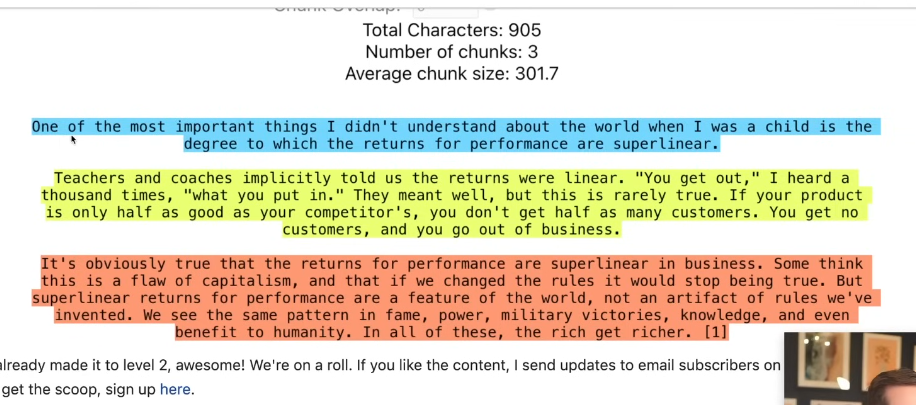

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [6]:
splitter =RecursiveCharacterTextSplitter(chunk_size=100,chunk_overlap=50)

In [7]:
splitted_test=splitter.split_documents(document)

In [9]:
pages2=[]
len_words=0
for i in range(10):
    len_words=len_words+len(document[i].page_content)
    pages2.append(document[i].page_content)


In [10]:
pages2

['Our Solar System Lecture 8 \nThe Cassini  Jiong Qiu, MSU Physics Department ',
 'Guiding Questions 1.\u202fAre all the other planets similar to Earth, or are they very different? 2.\u202fDo other planets have moons like Earth’s Moon? 3.\u202fHow do astronomers know what the other planets are made of? 4.\u202fAre all the planets made of basically the same material? 5.\u202fWhat is the difference between an asteroid and a comet? 6.\u202fWhat determines whether a planet or satellite can retain a certain gas in its atmosphere? 7.\u202fWhy do interplanetary spacecraft carry devices for measuring magnetic fields? ',
 'Current, Future, and Past Solar System Missions     Planetary exploration missions are conducted by some of the most sophisticated robots ever built. Through them we extend our senses to the farthest reaches of the solar system and into remote and hostile environments, where the secrets of our origins and destiny lie hidden. The coming years of solar system exploration promis

Document Level SPlitting 

In [44]:
# MArk Down splitter 
from langchain.text_splitter import MarkdownTextSplitter


In [45]:
splitter=MarkdownTextSplitter(chunk_size=200,chunk_overlap=50)

In [46]:
docs=splitter.split_documents(document)

In [47]:
docs

[Document(metadata={'source': 'data/solar.pdf', 'page': 0}, page_content='Our Solar System Lecture 8 \nThe Cassini  Jiong Qiu, MSU Physics Department'),
 Document(metadata={'source': 'data/solar.pdf', 'page': 1}, page_content='Guiding Questions 1.\u202fAre all the other planets similar to Earth, or are they very different? 2.\u202fDo other planets have moons like Earth’s Moon? 3.\u202fHow do astronomers know what the other planets are'),
 Document(metadata={'source': 'data/solar.pdf', 'page': 1}, page_content='do astronomers know what the other planets are made of? 4.\u202fAre all the planets made of basically the same material? 5.\u202fWhat is the difference between an asteroid and a comet? 6.\u202fWhat determines'),
 Document(metadata={'source': 'data/solar.pdf', 'page': 1}, page_content='an asteroid and a comet? 6.\u202fWhat determines whether a planet or satellite can retain a certain gas in its atmosphere? 7.\u202fWhy do interplanetary spacecraft carry devices for measuring magnet

<b>Pdf with Table </b>
{Unstructred Data }

<> Semantic Chunker